In [2]:
import pandas as pd
from datetime import date
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("google_stock_price.csv")
df_copy = df.copy()
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


<Axes: ylabel='Close'>

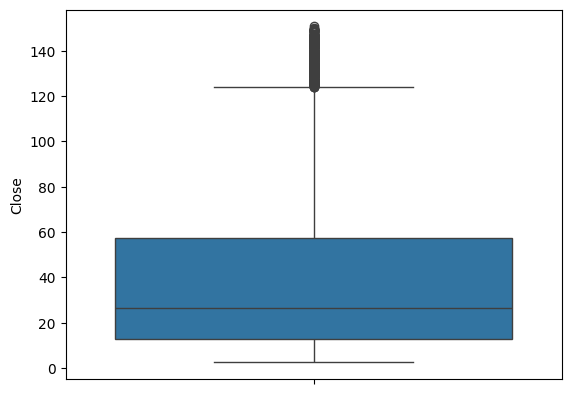

In [32]:
sns.boxplot(df_copy['Close'])



In [40]:
upper_quartile = np.percentile(df_copy['Close'], 75)
upper_quartile
lower_quartile = np.percentile(df_copy['Close'], 25)
iqr =  upper_quartile - lower_quartile
upper_whisker = df_copy[df_copy['Close'] <= upper_quartile + 1.5*iqr].max()
upper_whisker123.870003


Date         2023-10-27
Open         127.574997
High         129.550003
Low          123.099998
Close        123.870003
Adj Close    123.870003
Volume       1650832619
dtype: object

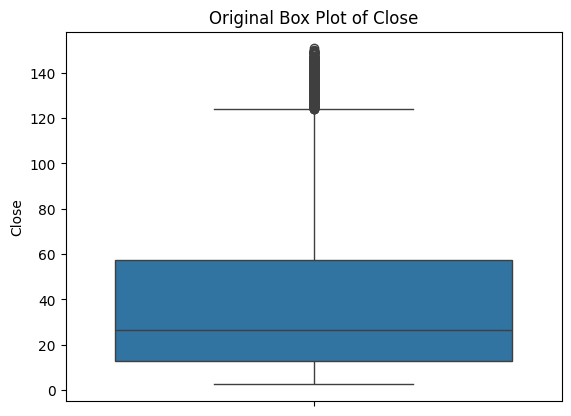

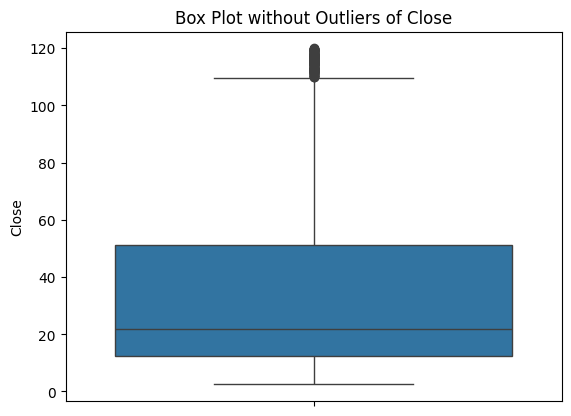

4842

In [50]:
def removal_box_plot(df_copy, column, threshold):
    sns.boxplot(df_copy[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df_copy[df_copy[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 120
 
no_outliers = removal_box_plot(df_copy, 'Close', threshold_value)
count_row = df_copy.shape[0]
count_row


In [17]:
def remove_outliers(df_copy, outlier_margin = 0.67):
    Q1 = df_copy["Close"].quantile(0.15)
    Q3  = df_copy["Close"].quantile(0.85)
    IQR = Q3 - Q1
    print(Q1, Q3, IQR)
    print(Q1 - outlier_margin * IQR)
    print(Q3 + outlier_margin * IQR)
    return df_copy[(df_copy["Close"] > (Q1 - outlier_margin * IQR)) & (df_copy["Close"] < (Q3 + outlier_margin * IQR))]
df_copy2 = remove_outliers(df_copy)
count_row = df_copy2.shape[0]
print(df_copy.shape[0], df_copy2.shape[0])


10.693430995941164 88.14062652587887 77.44719552993772
-41.970661964416486
140.80471948623654
4842 4751


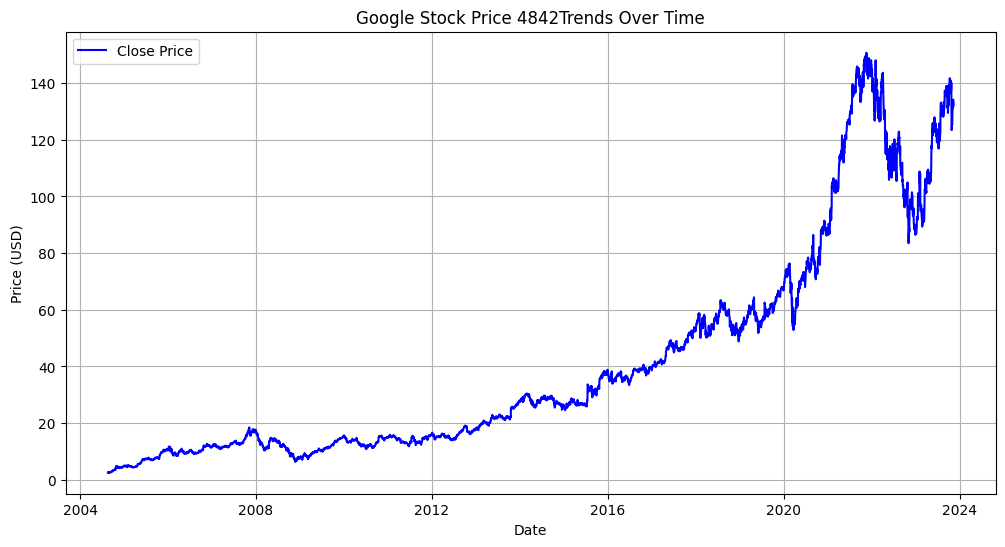

In [56]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Date'], df_copy['Close'], label='Close Price', color='blue')

plt.title('Google Stock Price 4842Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


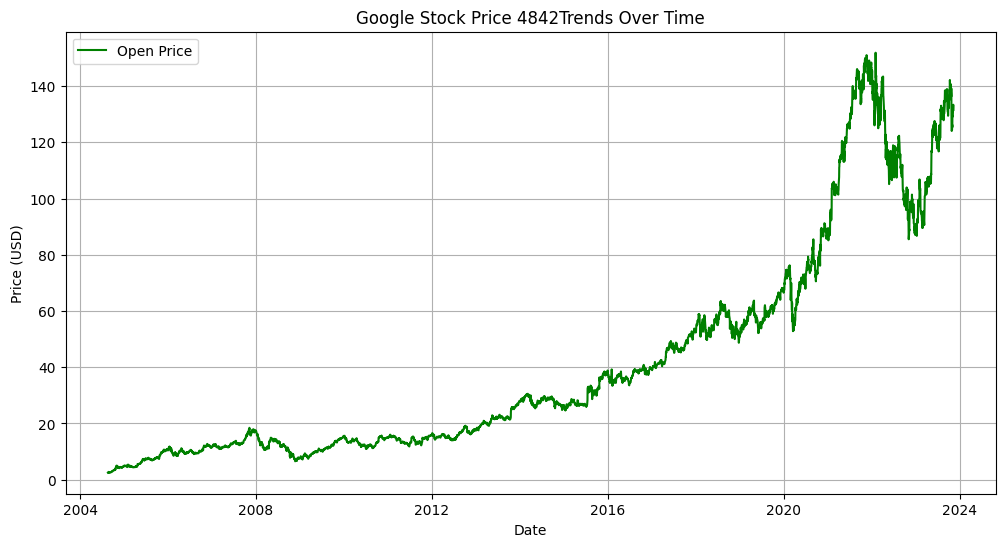

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Date'], df_copy['Open'], label='Open Price', color='green')

plt.title('Google Stock Price 4842Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

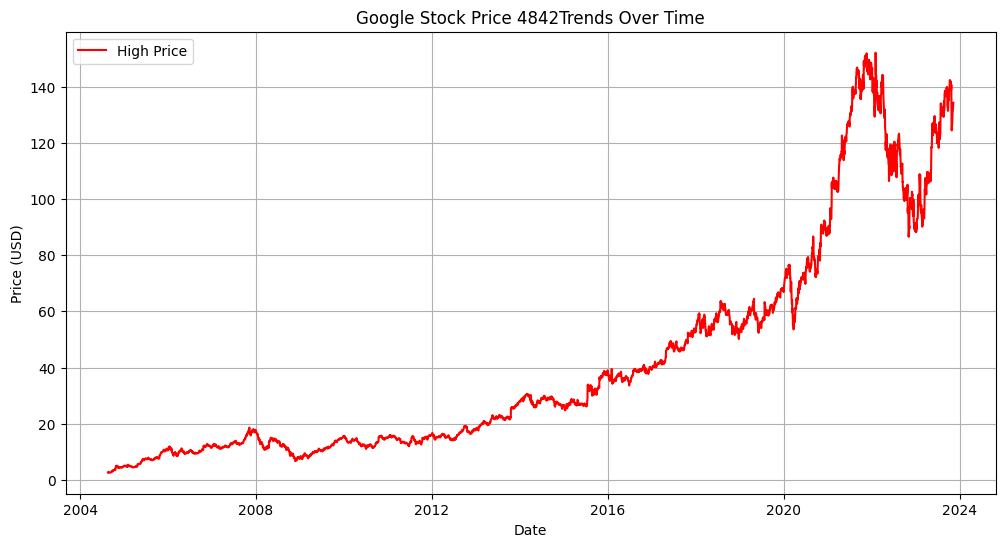

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Date'], df_copy['High'], label='High Price', color='red')

plt.title('Google Stock Price 4842Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

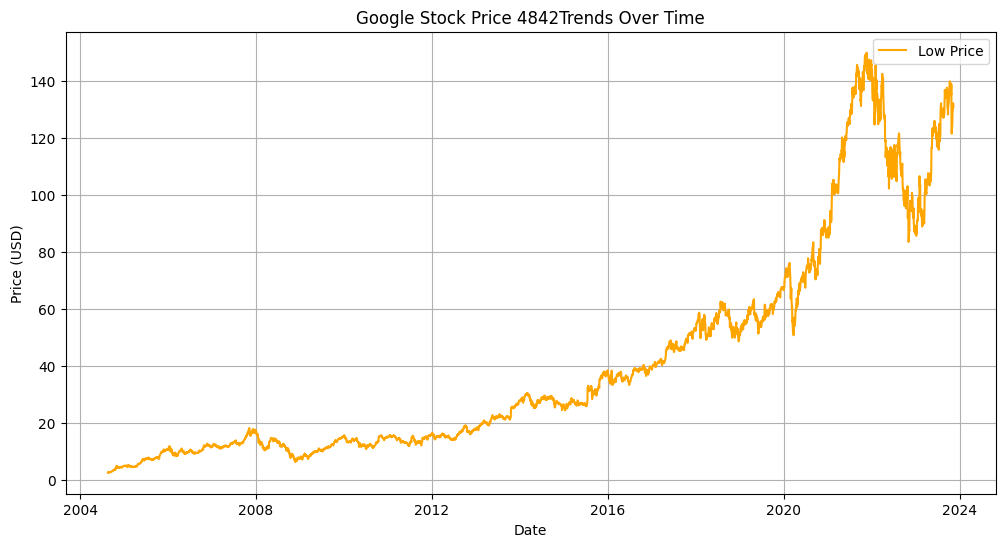

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Date'], df_copy['Low'], label='Low Price', color='orange')

plt.title('Google Stock Price 4842Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

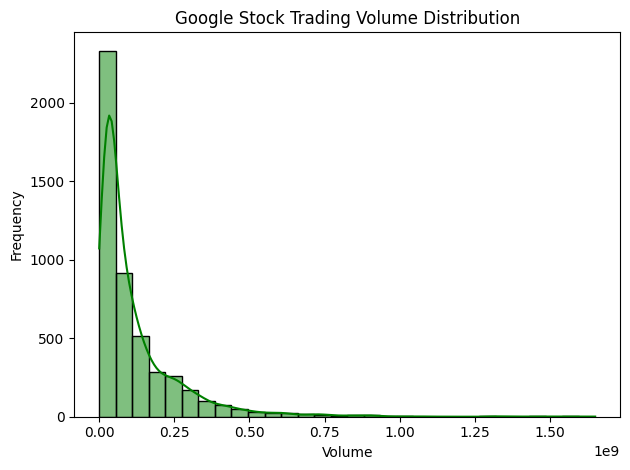

In [63]:
plt.subplot(1, 1, 1)
sns.histplot(df_copy['Volume'], bins=30, kde=True, color='green')
plt.title('Google Stock Trading Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


In [65]:
google_close_iqr = df_copy['Close'].quantile(0.75) - df_copy['Close'].quantile(0.25)
google_close_upper_bound = df_copy['Close'].quantile(0.75) + 1.5 * google_close_iqr

# Identify outliers for Google stock
google_outliers = df_copy[df_copy['Close'] > google_close_upper_bound]

# Print or further analyze the identified outliers
print("Google Stock Outliers:")
print(google_outliers)




Google Stock Outliers:
           Date        Open        High         Low       Close   Adj Close  \
4229 2021-06-08  123.995003  124.724747  123.412003  124.142502  124.142502   
4230 2021-06-09  124.974998  125.250000  124.366501  124.570000  124.570000   
4231 2021-06-10  124.700500  126.163002  124.699997  126.080002  126.080002   
4232 2021-06-11  126.246002  126.349503  124.914497  125.696503  125.696503   
4233 2021-06-14  125.669502  126.411499  125.046997  126.351997  126.351997   
...         ...         ...         ...         ...         ...         ...   
4837 2023-11-06  130.220001  131.559998  129.929993  131.449997  131.449997   
4838 2023-11-07  131.979996  133.279999  131.139999  132.399994  132.399994   
4839 2023-11-08  132.360001  133.539993  132.160004  133.259995  133.259995   
4840 2023-11-09  133.360001  133.960007  131.509995  131.690002  131.690002   
4841 2023-11-10  131.529999  134.270004  130.869995  134.059998  134.059998   

        Volume  
4229  25060

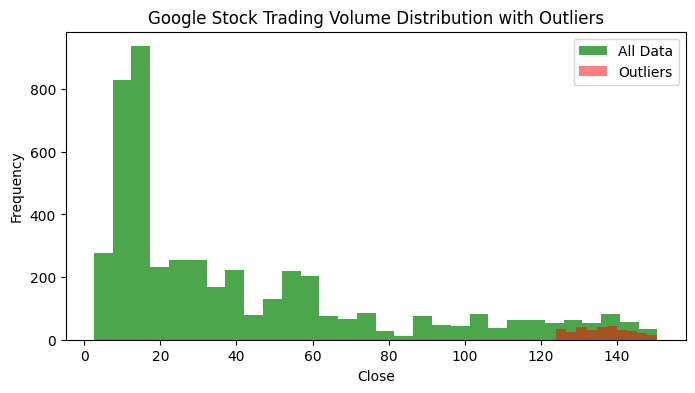

In [70]:
google_close_iqr = df_copy['Close'].quantile(0.75) - df_copy['Close'].quantile(0.25)
google_close_upper_bound = df_copy['Close'].quantile(0.75) + 1.5 * google_close_iqr

# Identify outliers for Google stock
google_outliers = df_copy[df_copy['Close'] > google_close_upper_bound]

plt.figure(figsize=(8, 4))

plt.hist(df_copy['Close'], bins=30, color='green', alpha=0.7, label='All Data')
plt.hist(google_outliers['Close'], bins=10, color='red', alpha=0.5, label='Outliers')
plt.title('Google Stock Trading Volume Distribution with Outliers')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [ ]:
# a method for splitting our data into training and testing
def split_data(data_set, train_percentage, seed):
    # randomize the order of the data set in a new variable
    shuffled = data_set.sample(frac=1, random_state=seed)
    
    # find the split point between training and testing
    total_rows = shuffled.shape[0]
    training_rows = int(train_percentage * total_rows)

    # create the training set
    training = shuffled.iloc[:training_rows, :]
    testing = shuffled.iloc[training_rows:, :]
    
    # split the training attributes and labels
    training_X = training.drop("label", axis=1)
    training_y = training["label"]
   
    # split the testing attributes and labels
    testing_X = testing.drop("label", axis=1)
    testing_y = testing["label"]

    return training_X, training_y, testing_X, testing_y     #fcn from labs

In [ ]:
# use the part of the scikit-learn library that contains kNN
import sklearn.neighbors

# calculates the accuracy of k-Nearest Neighbors predictions
def calculate_accuracy(k, training_X, training_y, testing_X, testing_y):
    # create the kNN classifier
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)

    print(training_X.head())
    print(training_y[:10])
    
    # provide the training data to inform the classifier
    model.fit(training_X, training_y)

    print(testing_X.head())
    
    # make predictions on the testing data
    predictions = model.predict(testing_X)
    predictions[:10]

     # determine which predictions were correct
    were_correct = predictions == testing_y
    
    # count the number correct
    num_correct = sum(were_correct)
    
    # calculate the accuracy
    accuracy = num_correct / len(testing_y)
    
    # print out the accuracy
    return accuracy

In [ ]:
# split our data for the stock data set
training_X, training_y, testing_X, testing_y = split_data(df, 0.75, 12345)

# evaluate the accuracy of kNN for different values of k
k_values = [1, 2, 5, 10, 20, 50, 100, 200]
accuracies = []
for k in k_values:
    accuracy = calculate_accuracy(k, training_X, training_y, testing_X, testing_y)
    accuracies.append(accuracy)

# print the accuracies
accuracies

In [ ]:
#random forest for df

# split our data for the mnist1000 data set
training_X, training_y, testing_X, testing_y = split_data(df, 0.75, 12345)
predictor = tree.RandomTreeClassifier()
predictor.fit(training_X,training_y)

#build confusion matrix
ConfusionMatrix = []
for x in range(0,len(unique_labels)):
    ConfusionMatrix.append([])
    for y in range(0,len(unique_labels)):
        ConfusionMatrix[x].append(0)
#print(ConfusionMatrix)

#make predictions and add results to the confusion matrix
for i in range(0,len(testing_X)):
    actual = testing_y[i]
    predicted = str(predictor.predict([testing_X.iloc[i]])).strip("''[]")
    ConfusionMatrix[unique_labels.index(actual)][unique_labels.index(predicted)] += 1
    #print("Actual: " + actual + " Predicted: " + predicted + "\n")     #use this line to check each prediction

#print(ConfusionMatrix) 


# # sum up the counts of correct predictions 
correct_predictions = sum(ConfusionMatrix[i][i] for i in range(len(ConfusionMatrix)))
# #print(correct_predictions)

# # sum up all the counts in the confusion matrix to get total number of predictions made
total_predictions = sum(sum(row) for row in ConfusionMatrix)
# #print(total_predictions)

# #calculate accuracy
accuracy = (float(correct_predictions) / float(total_predictions))*100
# print(correct_predictions)
# print(total_predictions)
print("Accuracy:", accuracy)

In [ ]:
# Select relevant columns and set 'Date' as the index
google_data = df[['Date', 'Close']].set_index('Date')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_data)

In [ ]:
# Prepare the data for LSTM
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

time_steps = 10  # Adjust as needed
X, y = create_dataset(scaled_data, time_steps)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = y[:train_size], y[train_size:]

In [ ]:
# Reshape the input data for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

In [ ]:
# Make predictions on the test set
predictions = model.predict(testX)
predictions = scaler.inverse_transform(predictions)

# Invert the scaling for the actual values
actual_values = scaler.inverse_transform([testY])

# Evaluate the model
mse = mean_squared_error(actual_values[0], predictions[:, 0])
print(f'Mean Squared Error: {mse}')

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(google_data.index[train_size+time_steps:], actual_values[0], label='Actual Prices')
plt.plot(google_data.index[train_size+time_steps:], predictions[:, 0], label='LSTM Predictions', color='red')
plt.title('LSTM Model for Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Select relevant columns and set 'Date' as the index
google_data = df[['Date', 'Close']]
google_data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_data.values)

# Prepare the data for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10  # Adjust as needed
X, y = create_dataset(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = y[:train_size], y[train_size:]

# Reshape the input data for LSTM
trainX = np.expand_dims(trainX, axis=1)
testX = np.expand_dims(testX, axis=1)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, time_steps)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

# Make predictions on the test set
predictions = model.predict(testX)
predictions = scaler.inverse_transform(predictions)

# Invert the scaling for the actual values
actual_values = scaler.inverse_transform(testY.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(actual_values, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(google_data.index[train_size + time_steps:], actual_values, label='Actual Prices')
plt.plot(google_data.index[train_size + time_steps:], predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Model for Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
